In [2]:
import numpy as np
import pandas as pd

In [4]:
# Load Dataset
df=pd.read_csv("/content/Churn_Modelling.csv")

In [5]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
#Univariate analysis
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

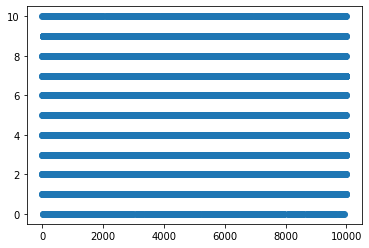

In [14]:
plt.scatter(df.index,df['Tenure'])
plt.show()

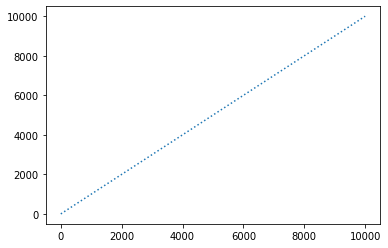

In [11]:
ypoints = np.array(df['RowNumber'])
plt.plot(ypoints, linestyle = 'dotted')
plt.show()

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <a list of 10 Patch objects>)

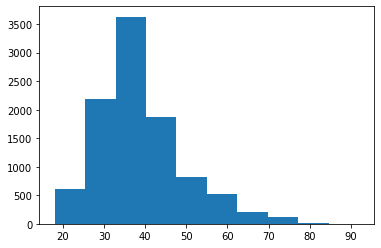

In [12]:
x=df['Age']
plt.hist(x)

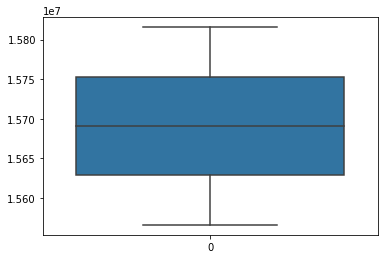

In [15]:
sns.boxplot(data=df['CustomerId'])

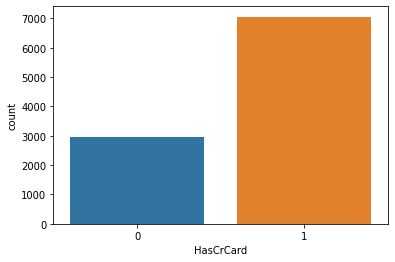

In [16]:
sns.countplot(x ='HasCrCard', data = df)

In [17]:
import statsmodels.api as sm

#define response variable
y = df['Exited']

#define explanatory variable
x = df[['CreditScore']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Exited   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.345
Date:                Sun, 02 Oct 2022   Prob (F-statistic):            0.00674
Time:                        07:45:26   Log-Likelihood:                -5091.3
No. Observations:               10000   AIC:                         1.019e+04
Df Residuals:                    9998   BIC:                         1.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2771      0.027     10.115      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


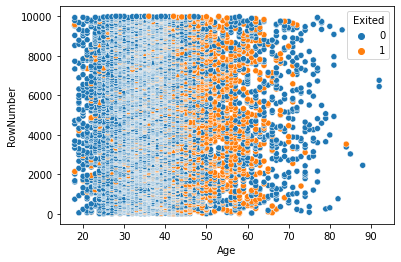

In [18]:
#Bivariate Analysis

sns.scatterplot(x='Age', y='RowNumber', data=df, hue='Exited')

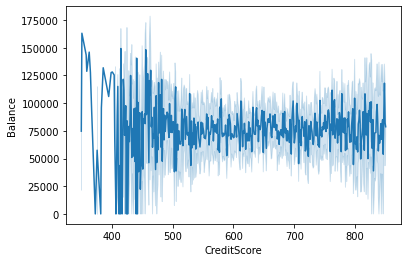

In [19]:
sns.lineplot(x="CreditScore", y="Balance", data=df)
plt.show()

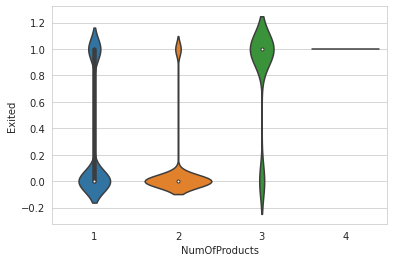

In [25]:
sns.violinplot(x ='NumOfProducts', y ='Exited', data = df)

In [21]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


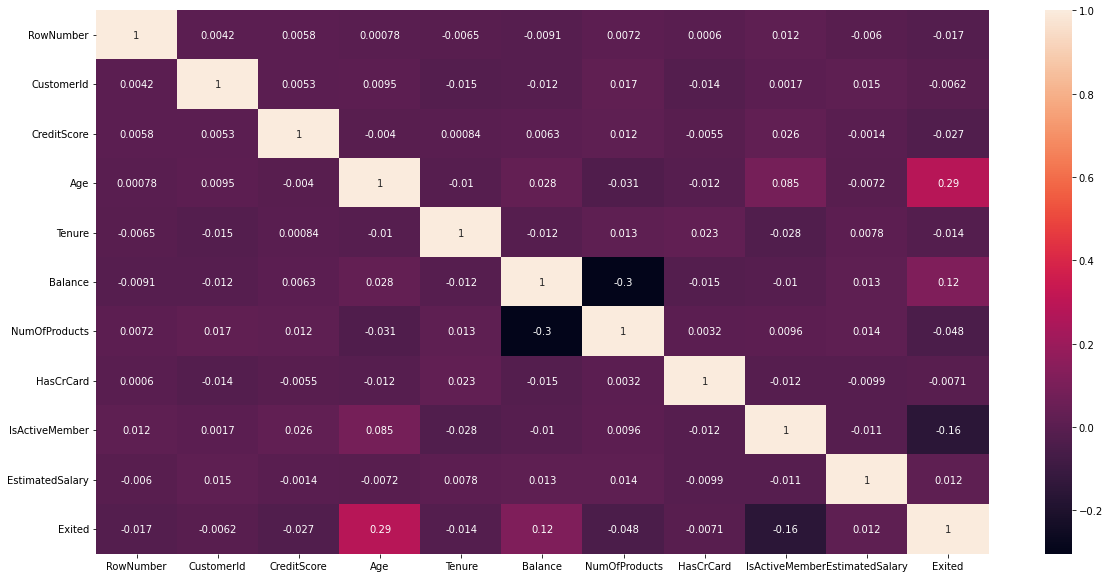

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize =(20, 10))
sns.heatmap(df.corr(), annot=True)

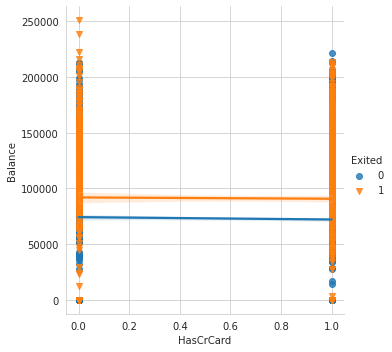

In [23]:
sns.set_style('whitegrid')
sns.lmplot(x ='HasCrCard', y ='Balance', data = df, 
           hue ='Exited', markers =['o', 'v'])

In [26]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [61]:
#Multi-variate Analysis

#Logistic Regression
import statsmodels.formula.api as smf
riskmodel = smf.logit(formula = 'Exited ~ CreditScore + Age	+ Tenure +	Balance	+ NumOfProducts +	HasCrCard +	IsActiveMember	+ EstimatedSalary', data = df).fit()

Optimization terminated successfully.
         Current function value: 0.439184
         Iterations 6


In [62]:
riskmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 9984
Model:                          Logit   Df Residuals:                     9975
Method:                           MLE   Df Model:                            8
Date:                Sun, 02 Oct 2022   Pseudo R-squ.:                  0.1282
Time:                        08:13:23   Log-Likelihood:                -4384.8
converged:                       True   LL-Null:                       -5029.4
Covariance Type:            nonrobust   LLR p-value:                5.243e-273
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.9220      0.241    -16.290      0.000      -4.394      -3.450
CreditScore        -0.0004      0.000     -1.412      0.158      -0.001       0.000
Age                 0.0729      0.003     28.680      0.000       0.068       0.078
Tenure             -0.0155      0.009     -1.675      0.094      -0.034       0.003
Balance          4.958e-06   4.58e-07     10.816      0.000    4.06e-06    5.86e-06
NumOfProducts      -0.0239      0.046     -0.516      0.606      -0.115       0.067
HasCrCard          -0.0352      0.059     -0.602      0.547      -0.150       0.079
IsActiveMember     -1.0839      0.057    -18.986      0.000      -1.196      -0.972
EstimatedSalary  4.511e-07   4.68e-07      0.964      0.335   -4.66e-07    1.37e-06
===================================================================================
"""

In [63]:
import numpy as np
conf = riskmodel.conf_int()
conf['OR'] = riskmodel.params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

                     2.5%     97.5%        OR
Intercept        0.012353  0.031742  0.019801
CreditScore      0.999060  1.000153  0.999606
Age              1.070230  1.080940  1.075572
Tenure           0.966936  1.002644  0.984628
Balance          1.000004  1.000006  1.000005
NumOfProducts    0.891509  1.069281  0.976357
HasCrCard        0.860785  1.082676  0.965376
IsActiveMember   0.302477  0.378336  0.338287
EstimatedSalary  1.000000  1.000001  1.000000


In [64]:
from sklearn.metrics import confusion_matrix
predicted_values1 = riskmodel.predict()
threshold=0.5
predicted_class1=np.zeros(predicted_values1.shape)
predicted_class1[predicted_values1>threshold]=1
cm1 = confusion_matrix(df['Exited'],predicted_class1)
print('Confusion Matrix :',cm1)

Confusion Matrix : [[7744  219]
 [1691  330]]


In [65]:
from sklearn.metrics import classification_report
print(classification_report(df['Exited'],predicted_class1))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7963
           1       0.60      0.16      0.26      2021

    accuracy                           0.81      9984
   macro avg       0.71      0.57      0.57      9984
weighted avg       0.78      0.81      0.76      9984



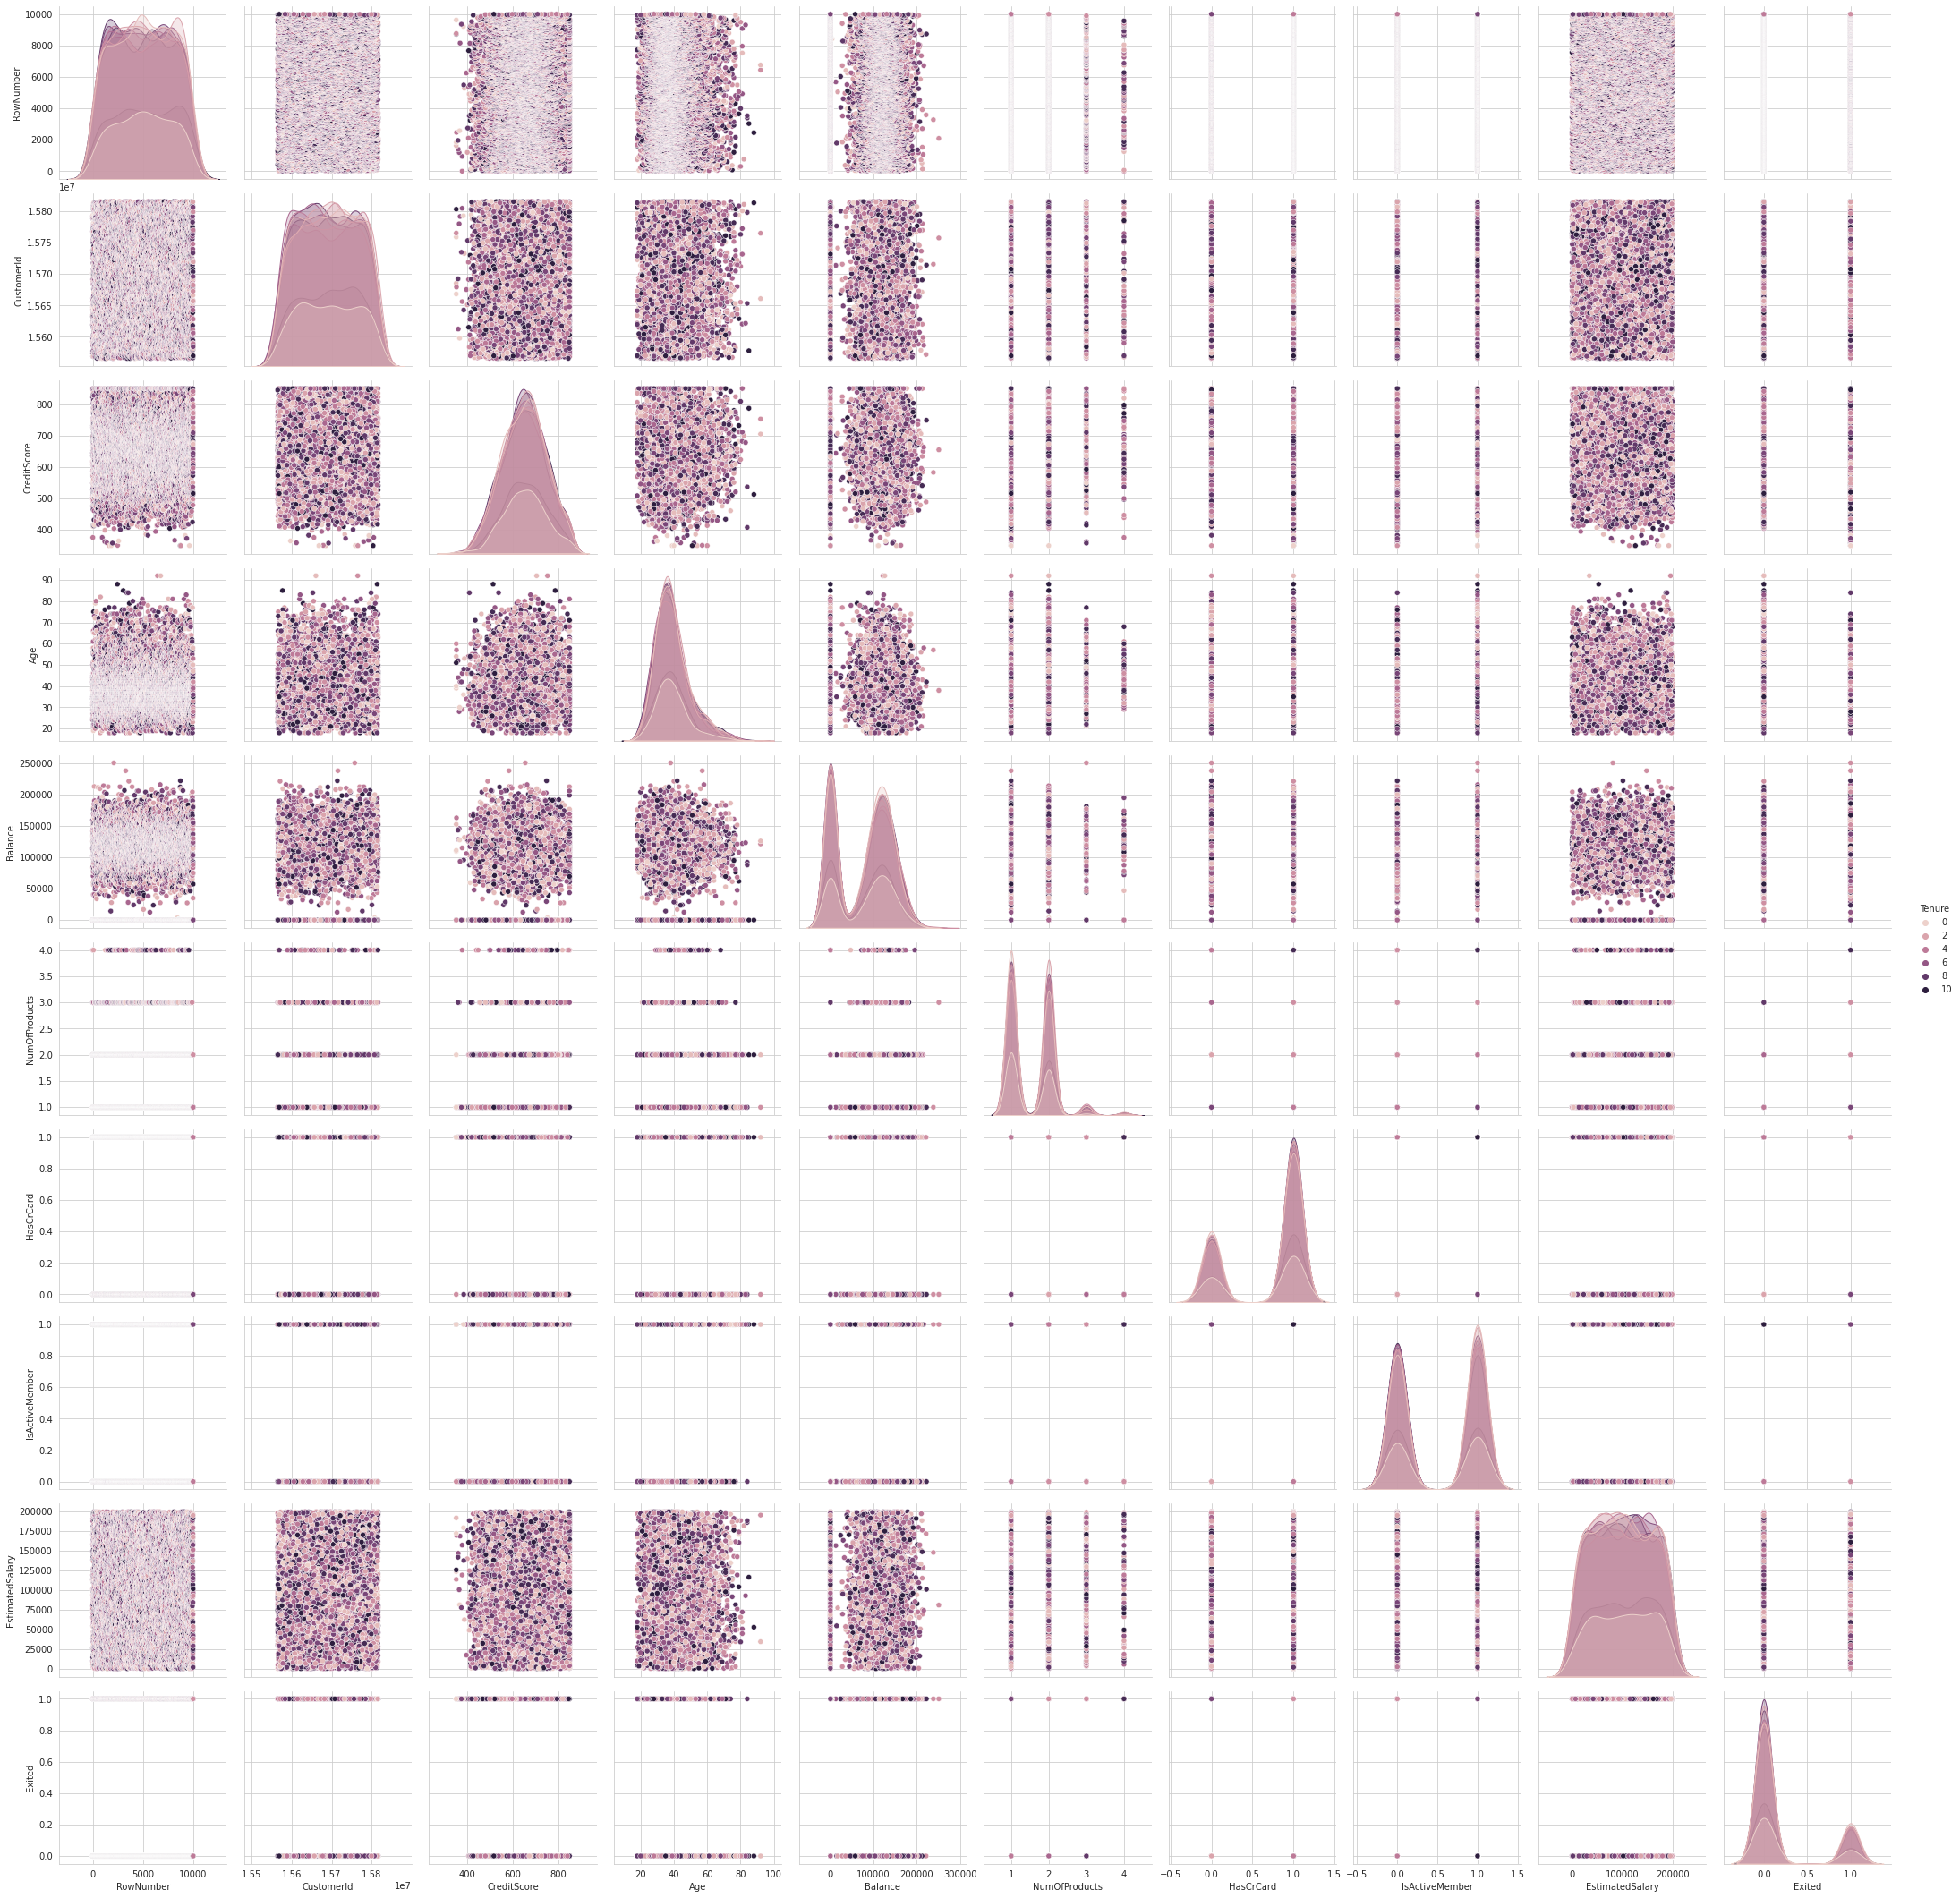

In [28]:
sns.pairplot(df,hue="Tenure",height=3)
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
x=df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y=df['Exited']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [67]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [68]:
y_pred = classifier.predict(x_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
ac = accuracy_score(y_test,y_pred)
print(ac)

0.7646469704556835


In [69]:
x_pred=classifier.predict(x_train)
print("Training accuracy:",accuracy_score(y_train,x_pred))
ac = accuracy_score(y_test,y_pred)
print("Testing accuracy:",ac)

Training accuracy: 0.7882809565544009
Testing accuracy: 0.7646469704556835


In [70]:
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)
y_prediction = LR.predict(x_test)
y_prediction

array([0.21435116, 0.17405544, 0.33507972, ..., 0.17121607, 0.43299137,
       0.21080139])

In [71]:
#Descriptive Statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9984 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9984 non-null   int64  
 1   CustomerId       9984 non-null   int64  
 2   CreditScore      9984 non-null   int64  
 3   Geography        9984 non-null   int64  
 4   Gender           9984 non-null   int64  
 5   Age              9984 non-null   int64  
 6   Tenure           9984 non-null   int64  
 7   Balance          9984 non-null   float64
 8   NumOfProducts    9984 non-null   int64  
 9   HasCrCard        9984 non-null   int64  
 10  IsActiveMember   9984 non-null   int64  
 11  EstimatedSalary  9984 non-null   float64
 12  Exited           9984 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 1.1 MB


In [72]:
df.describe()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9984.000000,9.984000e+03,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000
mean,5001.164964,1.569090e+07,650.990084,0.745893,0.454127,38.914263,5.013922,76469.513735,1.530248,0.705329,0.515525,100029.413677,0.202424
std,2885.601562,7.193467e+04,96.039600,0.827404,0.497916,10.487614,2.891491,62397.860249,0.580913,0.455918,0.499784,57521.025873,0.401827
min,1.000000,1.556570e+07,386.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2504.750000,1.562839e+07,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50908.022500,0.000000
50%,5001.500000,1.569073e+07,652.000000,0.000000,0.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100114.385000,0.000000
75%,7498.250000,1.575318e+07,718.000000,1.000000,1.000000,44.000000,7.250000,127638.027500,2.000000,1.000000,1.000000,149373.527500,0.000000
max,10000.000000,1.581569e+07,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [73]:
df['Exited'].value_counts()

0    7963
1    2021
Name: Exited, dtype: int64

In [74]:
df.isna().any()

RowNumber          False
CustomerId         False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [75]:
print("The mean of Credit Score:",df['CreditScore'].mean())

The mean of Credit Score: 650.9900841346154


In [76]:
print("The mode of Tenure:",df['Tenure'].mode())

The mode of Tenure: 0    2
dtype: int64


In [77]:
print("The median of Age:",df['Age'].median())

The median of Age: 37.0


In [78]:
mth_exp_tmp = pd.crosstab(index=df["EstimatedSalary"], columns="count")
mth_exp_tmp.reset_index(inplace=True)
mth_exp_tmp[mth_exp_tmp['count'] == df.EstimatedSalary.value_counts().max()]


col_0,EstimatedSalary,count
1211,24924.92,2


In [79]:
#standard deviation for 5 columns
pd.DataFrame(df.iloc[:,0:6].std().to_frame()).T

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age
0,2885.601562,71934.671265,96.0396,0.827404,0.497916,10.487614


In [29]:
#Handling Missing Values

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [32]:
updated_df = df.dropna(axis=0)

In [30]:
df.shape

(10000, 14)

In [33]:
updated_df.shape

(10000, 14)

In [34]:
updated_df['Age']=updated_df['Age'].fillna(updated_df['Age'].mean())

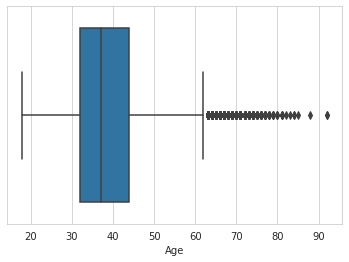

In [35]:
#Find and replacing outliers
sns.boxplot(x='Age', data=df)

In [36]:
#Detecting outlier using IQR
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
print(iqr)

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64


In [37]:
#Removing outlier
upperlimit=df.Age.mean()+3*df.Age.std()
upperlimit

70.38521935511383

In [38]:
lowerlimit=df.Age.mean()-3*df.Age.std()
lowerlimit

7.458380644886169

In [39]:
#displaying outliers
df[(df.Age>upperlimit) | (df.Age<lowerlimit)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
85,86,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
158,159,15589975,Maclean,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
230,231,15808473,Ringrose,673,France,Male,72,1,0.00,2,0,1,111981.19,0
252,253,15793726,Matveyeva,681,France,Female,79,0,0.00,2,0,1,170968.99,0
310,311,15712287,Pokrovskii,652,France,Female,80,4,0.00,2,1,1,188603.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9646,9647,15603111,Muir,850,Spain,Male,71,10,69608.14,1,1,0,97893.40,1
9671,9672,15636061,Pope,649,Germany,Male,78,4,68345.86,2,1,1,142566.75,0
9736,9737,15644103,Wells,659,Spain,Male,78,2,151675.65,1,0,1,49978.67,0
9894,9895,15704795,Vagin,521,France,Female,77,6,0.00,2,1,1,49054.10,0


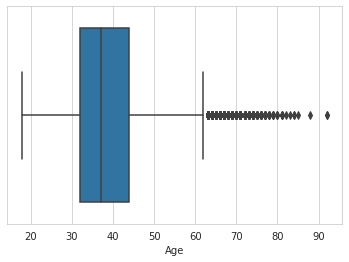

In [40]:
#all outliers are removed
sns.boxplot(x='Age', data=df)

Old Shape:  (10000, 14)
New Shape:  (9984, 14)


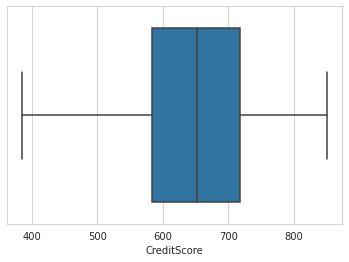

In [41]:
import sklearn
from sklearn.datasets import load_boston 

Q1 = np.percentile(df['CreditScore'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(df['CreditScore'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1 
print("Old Shape: ", df.shape) 
upper = np.where(df['CreditScore'] >= (Q3+1.5*IQR)) 
lower = np.where(df['CreditScore'] <= (Q1-1.5*IQR)) 
df.drop(upper[0], inplace = True) 
df.drop(lower[0], inplace = True) 
print("New Shape: ", df.shape) 
sns.boxplot(x='CreditScore', data=df)

In [42]:
#Categorical Variable and Encoding
numeric_data = df.select_dtypes(include=[np.number]) 
categorical_data = df.select_dtypes(exclude=[np.number]) 
print("Number of numerical variables: ", numeric_data.shape[1]) 
print("Number of categorical variables: ", categorical_data.shape[1])

Number of numerical variables:  11
Number of categorical variables:  3


In [43]:
print("Number of categorical variables: ", categorical_data.shape[1]) 
Cat_vars = list(categorical_data.columns)
Cat_vars

Number of categorical variables:  3


['Surname', 'Geography', 'Gender']

In [44]:
df['Geography'].value_counts()


France     5008
Germany    2505
Spain      2471
Name: Geography, dtype: int64

In [45]:
CleanGeo = {"Geography":{"France": 0, "Germany": 1, "Spain":2}}


In [46]:
df = df.replace(CleanGeo)


In [47]:
df['Gender'].value_counts()


Male      5450
Female    4534
Name: Gender, dtype: int64

In [48]:
CleanGen = {"Gender": {"Male": 0, "Female": 1}}


In [49]:
df = df.replace(CleanGen)


In [50]:
df.drop(columns=['Surname'], inplace=True)

In [51]:
df.dtypes

RowNumber            int64
CustomerId           int64
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [52]:
#Independent and dependent Variable
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [53]:
#Scale independent variable

from sklearn.preprocessing import StandardScaler
object= StandardScaler()
# standardization 
scale = object.fit_transform(X) 
print(scale)

[[-1.73288491 -0.7826587  -0.33310933 ...  0.64635829  0.96941773
   0.02294   ]
 [-1.73253834 -0.60597566 -0.44765115 ... -1.54712953  0.96941773
   0.21755163]
 [-1.73219178 -0.99533453 -1.55141782 ...  0.64635829 -1.03154705
   0.24170036]
 ...
 [ 1.73173087 -1.47874178  0.60405105 ... -1.54712953  0.96941773
  -1.00740094]
 [ 1.73207743 -0.11878701  1.26006332 ...  0.64635829 -1.03154705
  -0.12415028]
 [ 1.732424   -0.87000621  1.46832118 ...  0.64635829 -1.03154705
  -1.07511523]]


In [54]:
#Train And Test Split

from sklearn.model_selection import train_test_split
# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=0)

In [55]:
X_train.shape

(9484, 12)

In [ ]:
X_test.shape

In [56]:
Y_train.shape

(9484,)

In [57]:
Y_test.shape

(500,)